In [1]:
#pip install numpy
#pip install pandas
#pip install scikit-learn
#pip install matplotlib
#pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

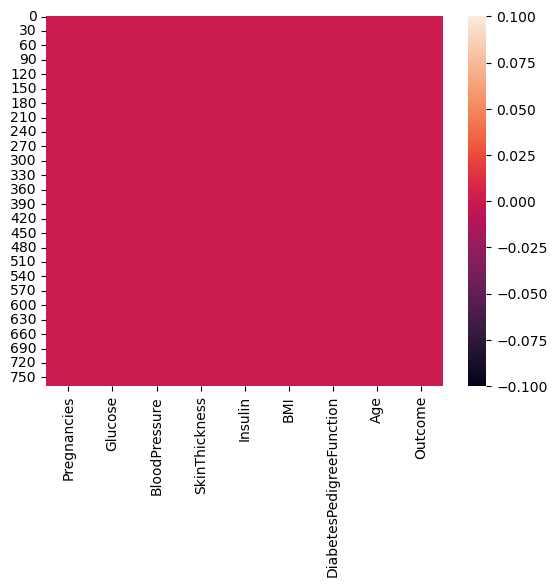

In [4]:
#Missing Values
sns.heatmap(data.isnull())

In [5]:
#Correlation matrix
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

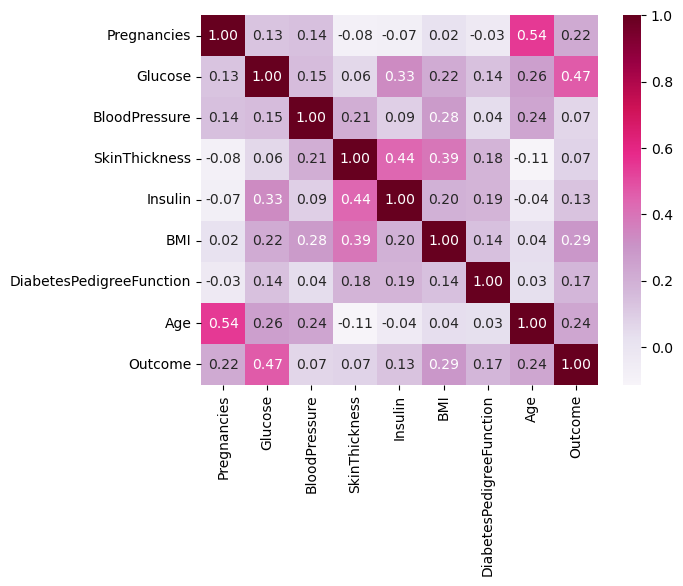

In [6]:
sns.heatmap(correlation, annot=True, cmap='PuRd', fmt=".2f")
plt.show()

C:\Users\manal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


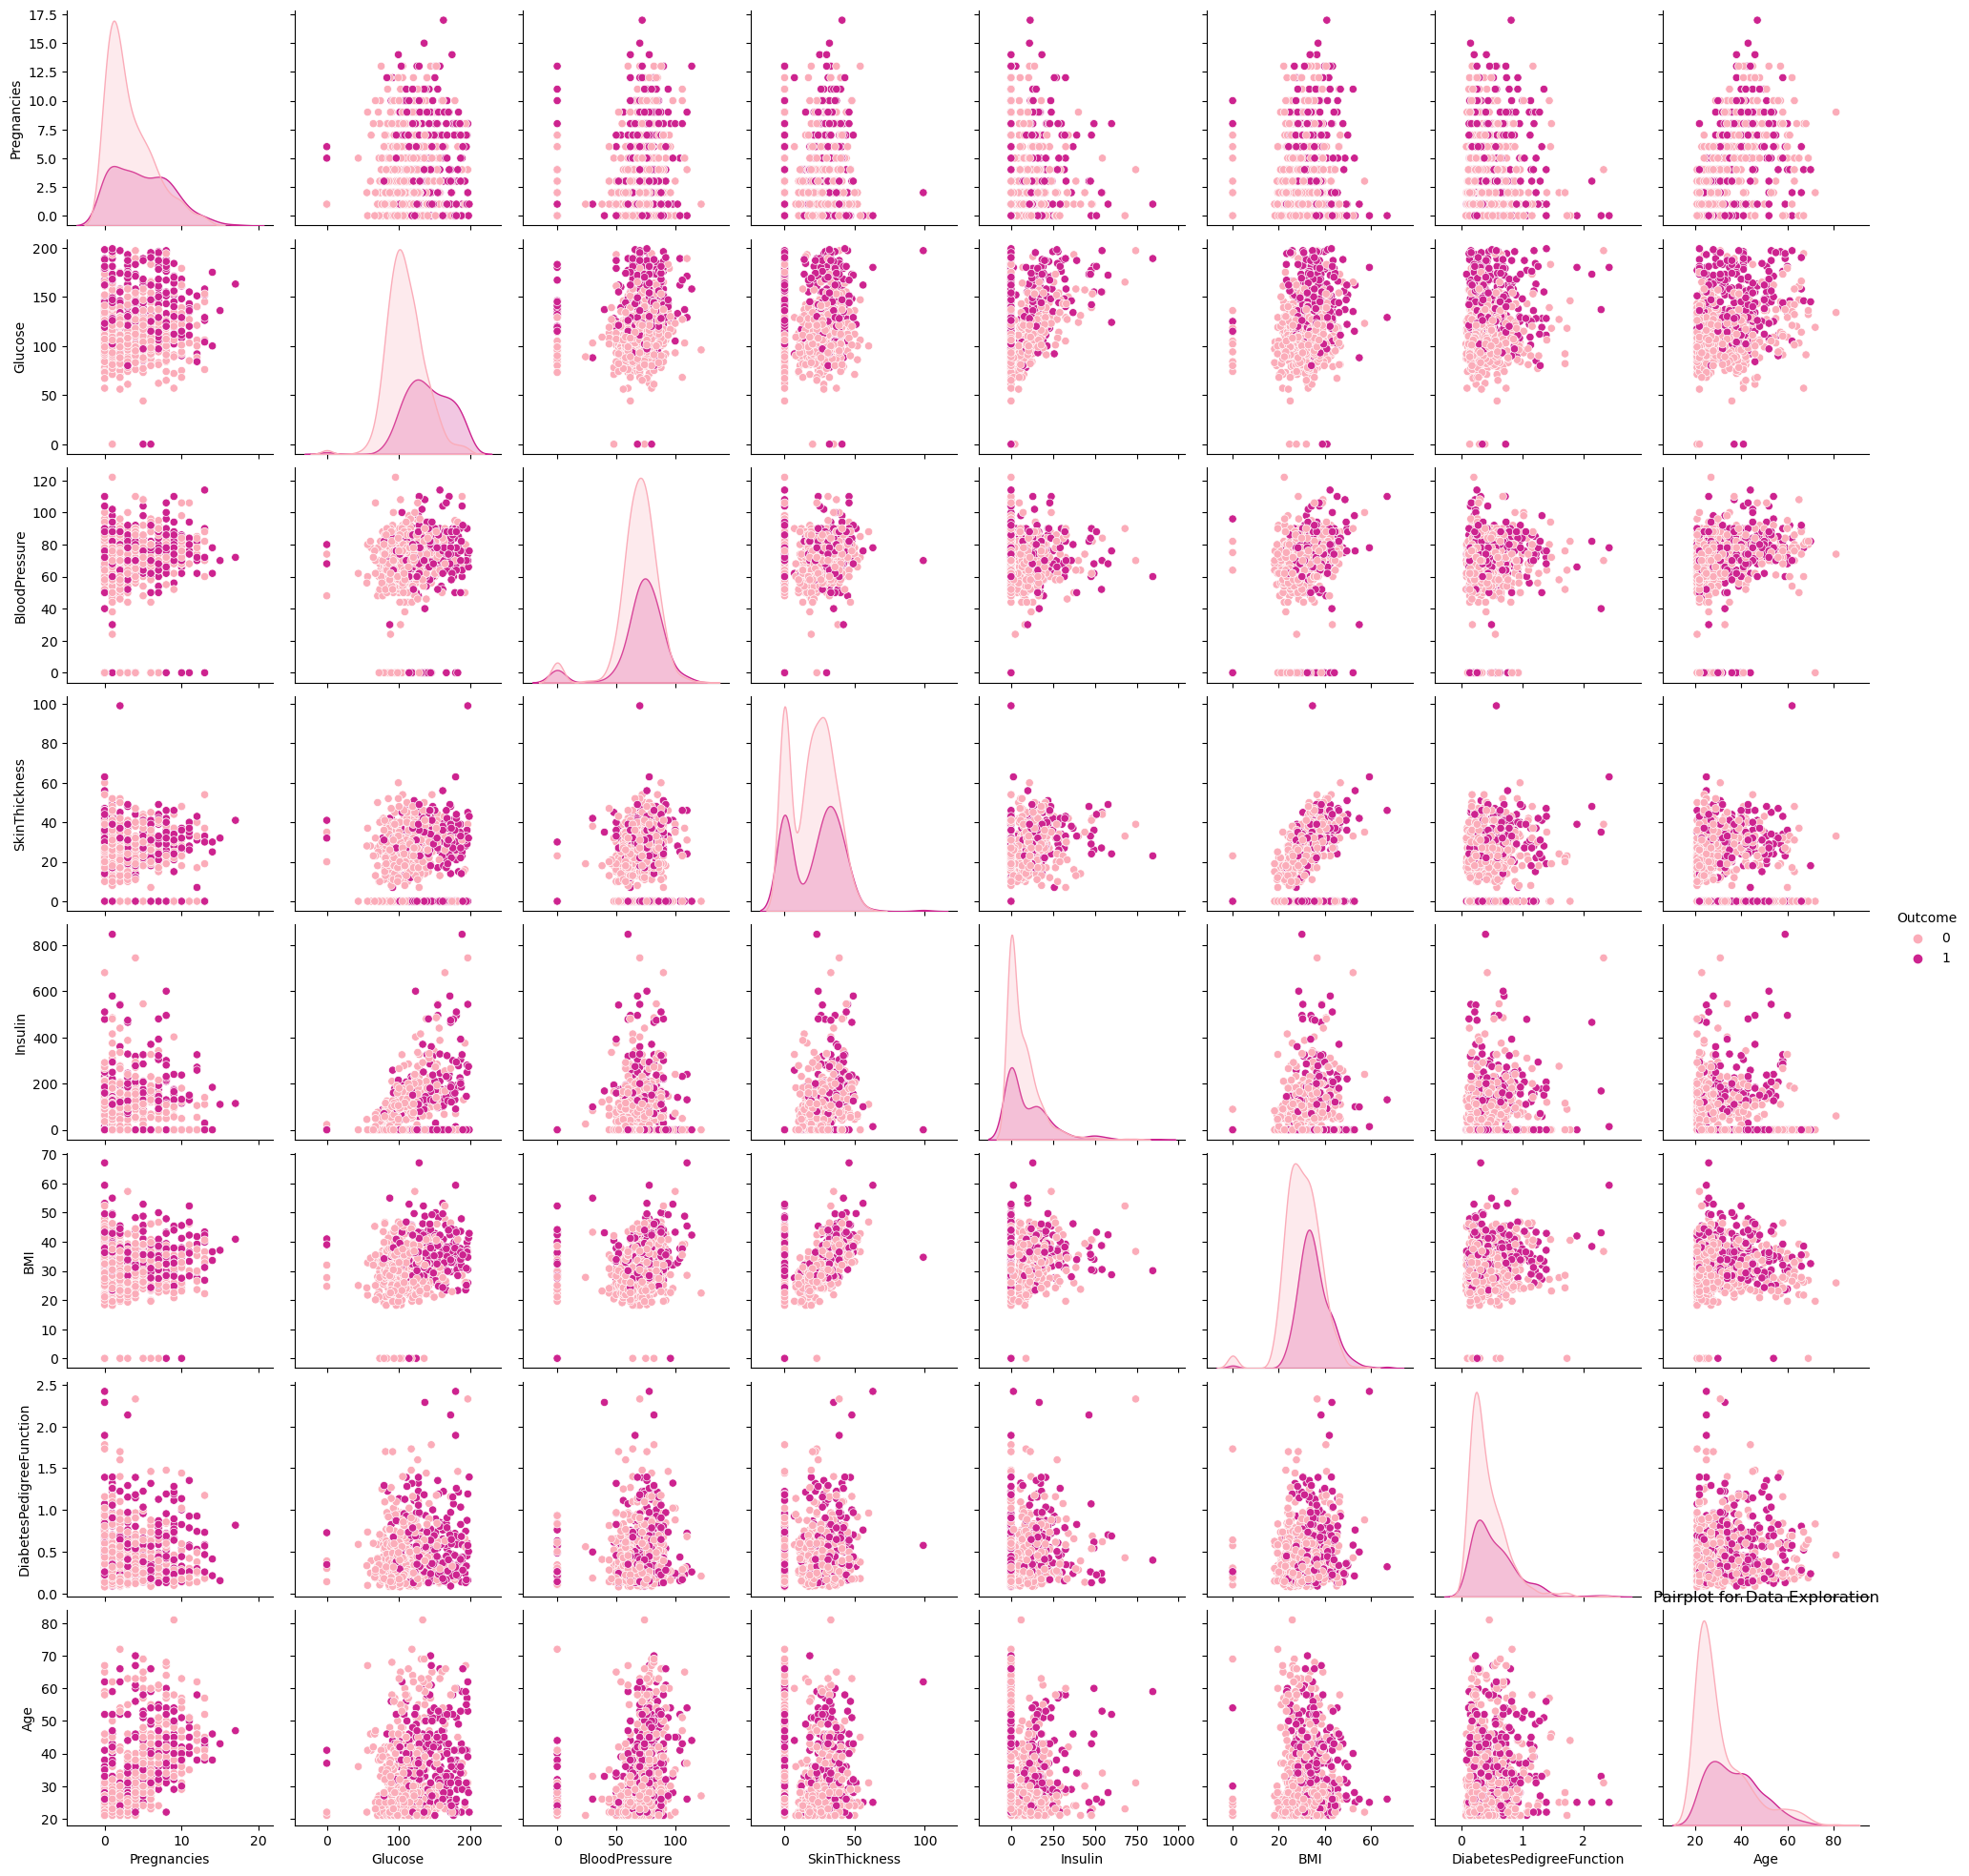

In [7]:
# Pairplot for Data Exploration
sns.pairplot(data, hue='Outcome', palette='RdPu')
plt.title('Pairplot for Data Exploration')
plt.show()

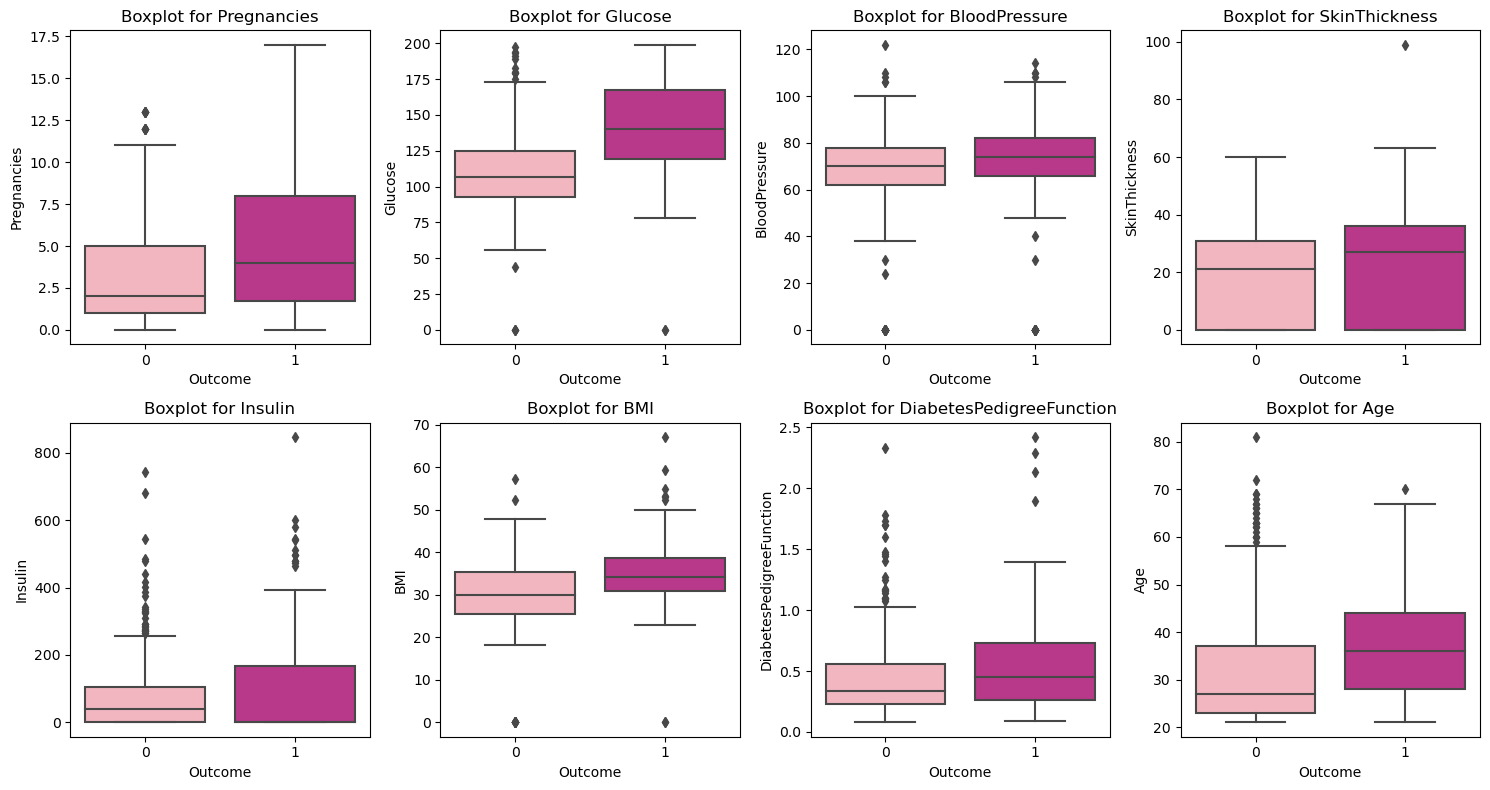

In [8]:
# Boxplots for Feature Analysis
plt.figure(figsize=(15, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='Outcome', y=column, data=data, palette='RdPu')
    plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()

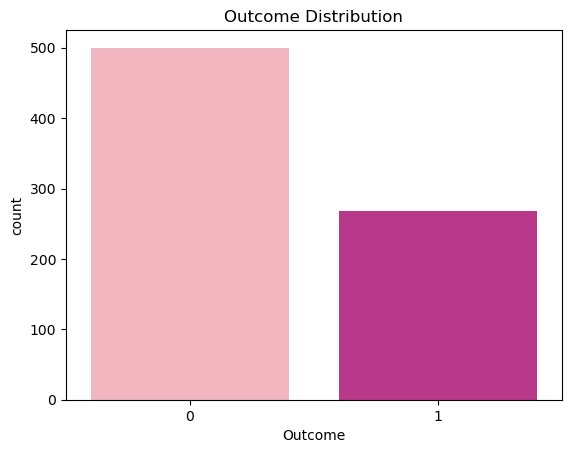

In [9]:
# Countplot for Outcome Distribution
sns.countplot(x='Outcome', data=data, palette='RdPu')
plt.title('Outcome Distribution')
plt.show()

In [10]:
#Train test split
X = data.drop("Outcome",axis=1)
Y = data['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [11]:
#Training the model
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\manal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

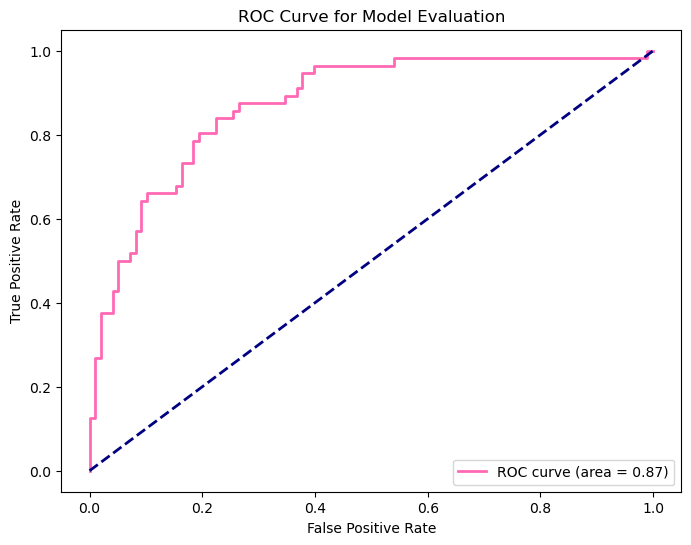

In [12]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
# ROC Curve for Model Evaluation
fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#FF69B4', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Evaluation')
plt.legend(loc='lower right')
plt.show()

In [13]:
#Prediction
prediction = model.predict(X_test)

In [14]:
print(prediction)

[0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 0 0]


In [15]:
accuracy = accuracy_score(prediction,Y_test)

In [16]:
print(accuracy)

0.8051948051948052


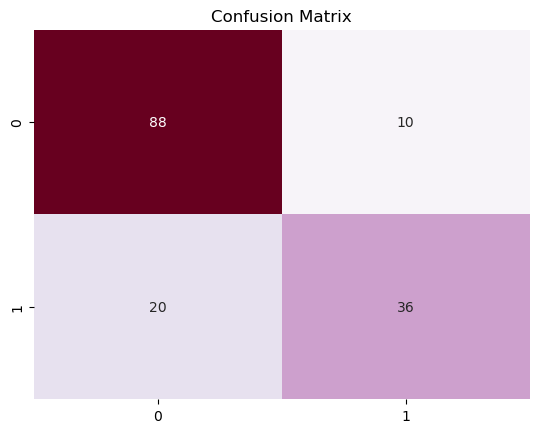

In [17]:
# Confusion Matrix
cm = confusion_matrix(Y_test, prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd", cbar=False)
plt.title('Confusion Matrix')
plt.show()

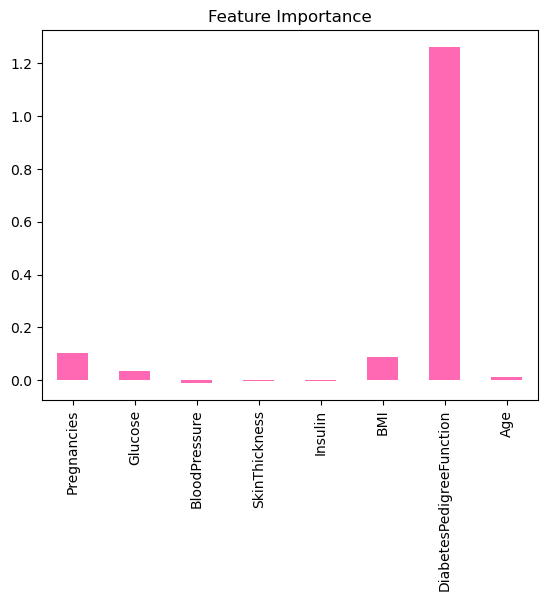

In [18]:
if hasattr(model, 'coef_'):
    feature_importance = pd.Series(model.coef_[0], index=X.columns)
    feature_importance.plot(kind='bar', color='#FF69B4')
    plt.title('Feature Importance')
    plt.show()

C:\Users\manal\AppData\Local\Temp\ipykernel_8684\4242465794.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['Outcome'] == 0, column], label='Outcome = 0', shade=True, color='#FF69B4')
C:\Users\manal\AppData\Local\Temp\ipykernel_8684\4242465794.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['Outcome'] == 1, column], label='Outcome = 1', shade=True, color='#FF69B4')
C:\Users\manal\AppData\Local\Temp\ipykernel_8684\4242465794.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['Outcome'] == 0, column], label='Outcome = 0', shade=True, color='#FF69B4')
C:\Users\manal\AppData

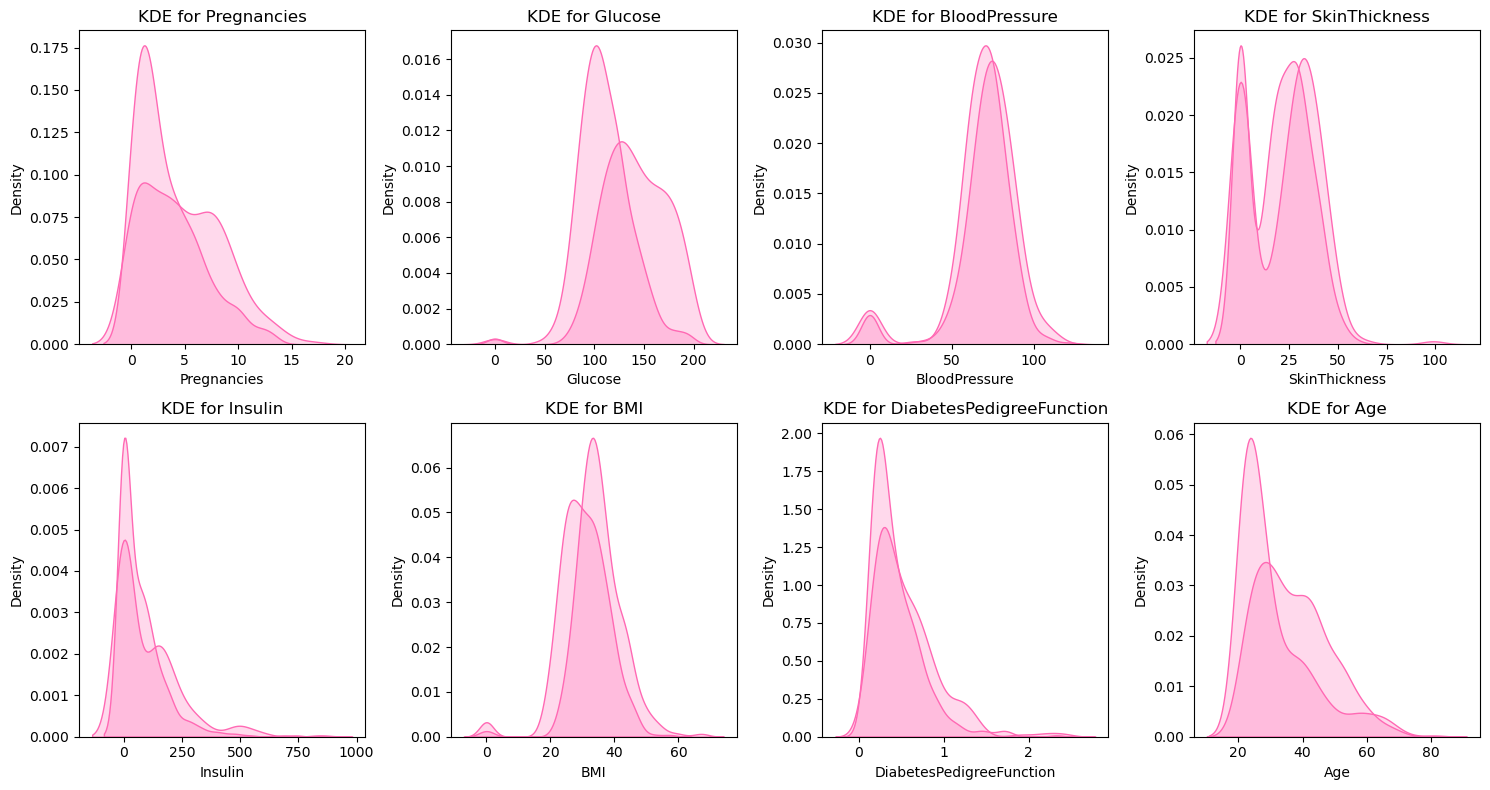

In [19]:
# Kernel Density Estimation (KDE)
plt.figure(figsize=(15, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.kdeplot(data.loc[data['Outcome'] == 0, column], label='Outcome = 0', shade=True, color='#FF69B4')
    sns.kdeplot(data.loc[data['Outcome'] == 1, column], label='Outcome = 1', shade=True, color='#FF69B4')
    plt.title(f'KDE for {column}')
plt.tight_layout()
plt.show()